In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Análisis Cafeterías de España



## **1. Carga y comprensión del conjunto de datos**

En este apartado se realiza una **primera toma de contacto con los datos** de ventas de cafeterías en España.

- Carga del archivo `.csv` que contiene la información del estudio.
- Visualización de las primeras filas para comprender la estructura del dataset.
- Revisión del número de registros y variables disponibles.
- Identificación del tipo de datos de cada columna.
- Descripción general de las variables más relevantes para el análisis.

*Este paso es fundamental para entender qué información tenemos y cómo podemos trabajar con ella.*

In [3]:
# 1.1 Carga del archivo `.csv` que contiene la información del estudio.
df = pd.read_csv("ventas_cafeterias_espana_bares.csv")

In [4]:

# 1.2 Visualización de las primeras filas para comprender la estructura del dataset.
df.head(10)

,ticket_id,fecha_hora,ciudad,bar,producto,categoria,precio_unitario,cantidad,metodo_pago
0,1,2025-03-03 22:25:16,Móstoles,Lounge Móstoles Sur,Croissant,reposteria,NaN,3,Bizum
1,2,2025-02-27 20:13:33,Eivissa,Cervecería Eivissa Puerto,Refresco,bebida,3.97,2,Efectivo
2,3,2025-09-14 23:53:31,Alicante,Café Alicante Este,Sandwich mixto,comida,3.31,1,Tarjeta
3,4,2025-07-12 10:06:51,Eivissa,Bar Eivissa Plaza Mayor,Latte,bebida,1.68,1,Efectivo
4,5,2025-03-02 03:42:48,Getafe,Cervecería Getafe Río,Napolitana,reposteria,1.7,2,Tarjeta
5,6,2025-11-01 20:42:20,Alicante,Lounge Alicante Oeste,Bizcocho,reposteria,1.4,1,Tarjeta
6,7,2025-05-17 22:19:12,Burgos,Gastrobar Burgos Norte,Café solo,bebida,2.52,1,Efectivo
7,8,2025-05-16 14:19:55,Ourense,Bar Ourense Casco Viejo,Sandwich mixto,comida,3.05,1,Bizum
8,9,2025-05-03 17:49:58,Ponferrada,Bar Ponferrada Estación,Cortado,bebida,1.47,2,Bizum
9,10,2025-05-01 00:39:41,Madrid,Taberna La Dolores,Tortilla de patata,comida,5.77,1,Efectivo


In [5]:
# 1.3 Revisión del número de registros y variables disponibles.
df.shape

(301514, 9)

In [6]:

# 1.4 Identificación del tipo de datos de cada columna.
df.dtypes

ticket_id           int64
fecha_hora         object
ciudad             object
bar                object
producto           object
categoria          object
precio_unitario    object
cantidad            int64
metodo_pago        object
dtype: object

In [7]:
# 1.5 Descripción general de las variables más relevantes para el análisis.
df.describe()


,ticket_id,cantidad
count,301514.000000,301514.000000
mean,149987.679915,1.349838
std,86596.089816,0.572184
min,1.000000,1.000000
25%,74989.250000,1.000000
50%,149979.500000,1.000000
75%,224966.750000,2.000000
max,300000.000000,3.000000


## **2. Limpieza y preprocesamiento de los datos**

Antes de realizar cualquier análisis, es necesario **asegurar la calidad de los datos**.

- Detección de valores nulos o inconsistentes.
- Tratamiento de valores faltantes mediante eliminación o sustitución.
- Corrección de tipos de datos incorrectos (numéricos, fechas o categorías).
- Eliminación de posibles registros duplicados.
- Preparación del dataset para el análisis exploratorio y la visualización.

*Unos datos limpios garantizan conclusiones más fiables.*

In [8]:
# 2.1 Detección de valores nulos o inconsistentes.
df.isnull().sum()

ticket_id             0
fecha_hora            0
ciudad                0
bar                   0
producto           3015
categoria          2938
precio_unitario    3067
cantidad              0
metodo_pago        3042
dtype: int64

In [9]:

# 2.2 Tratamiento de valores faltantes mediante eliminación o sustitución.
df = df.dropna()

In [10]:
# 2.3 Corrección de tipos de datos incorrectos (numéricos, fechas o categorías).
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')
df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce')
df['ticket_id'] = pd.to_numeric(df['ticket_id'], errors='coerce')
df = df.dropna(subset=['fecha_hora', 'cantidad', 'ticket_id'])

In [11]:
# 2.4 Eliminación de posibles registros duplicados.
df = df.drop_duplicates()

In [12]:
# 2.5 Preparación del dataset para el análisis exploratorio y la visualización.
df = df.reset_index(drop=True)

## **3. Análisis univariante de las ventas**

Se analiza la variable de ventas de forma individual para comprender su comportamiento general.

- Estudio de la distribución de las ventas.
- Identificación de la frecuencia de los distintos rangos de valores.
- Detección visual de posibles valores atípicos.

**Gráficos utilizados:**
- Histogramas  
- Boxplots 

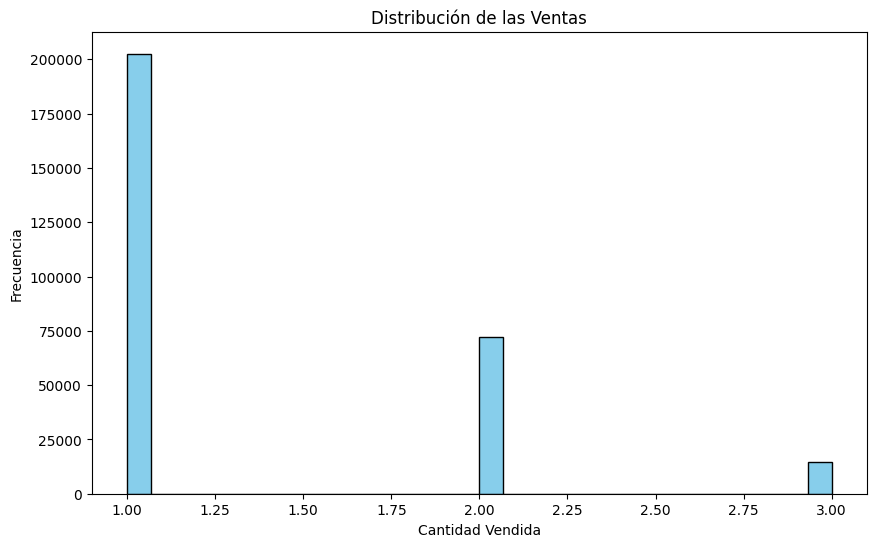

In [14]:
# - Estudio de la distribución de las ventas.
plt.figure(figsize=(10, 6))
plt.hist(df['cantidad'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de las Ventas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.show()

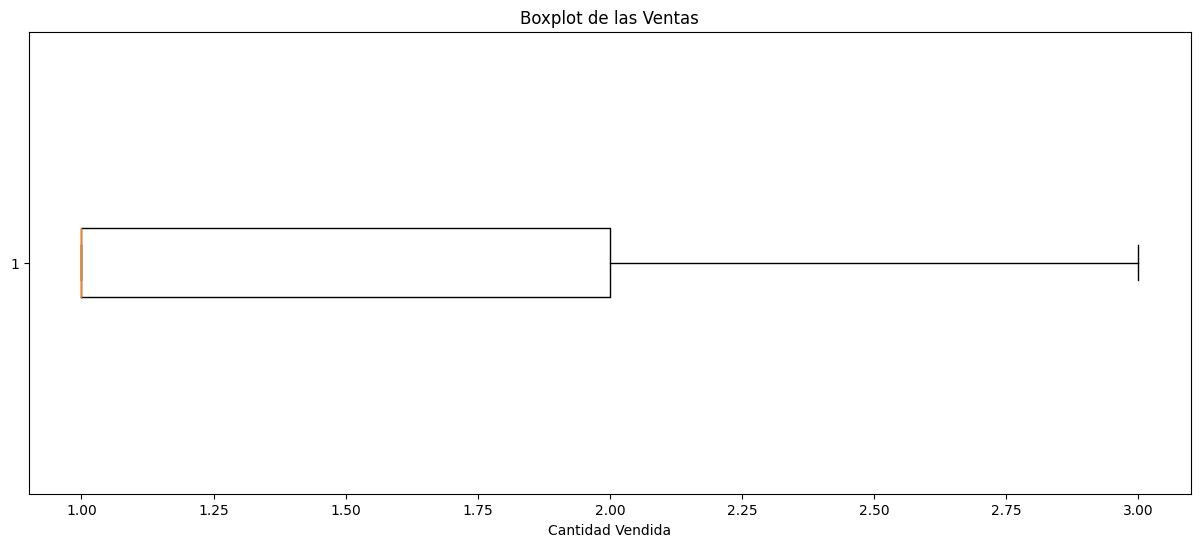

In [20]:
# - Identificación de la frecuencia de los distintos rangos de valores.
plt.figure(figsize=(15, 6))
plt.boxplot(df['cantidad'], vert=False)
plt.title('Boxplot de las Ventas')
plt.xlabel('Cantidad Vendida')
plt.show()

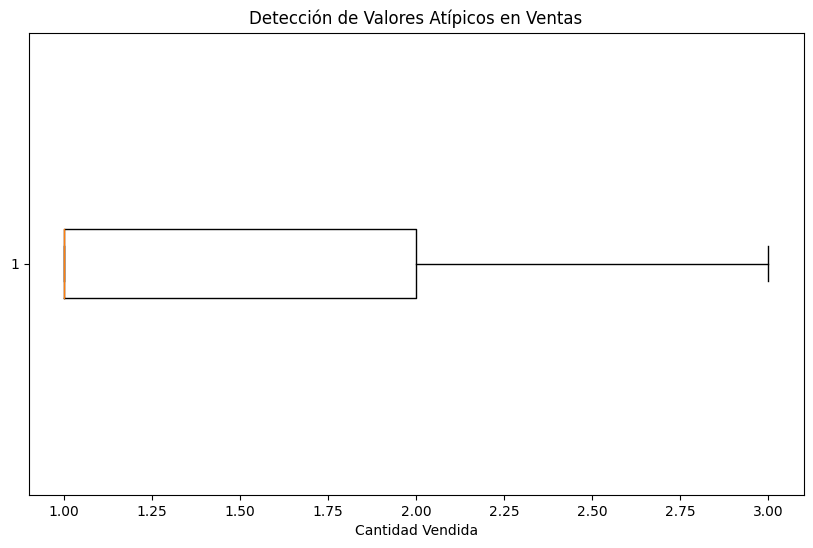

In [21]:
# - Detección visual de posibles valores atípicos.
plt.figure(figsize=(10, 6))
plt.boxplot(df['cantidad'], vert=False)
plt.title('Detección de Valores Atípicos en Ventas')
plt.xlabel('Cantidad Vendida')
plt.show()

## **4. Comparación de distribuciones mediante multihistogramas**

En este apartado se comparan las ventas según una característica concreta del dataset.

- Análisis de cómo varía la distribución de las ventas entre distintos grupos.
- Comparación visual entre categorías relevantes.
- Identificación de diferencias significativas entre los grupos analizados.

**Gráficos utilizados:**
- Multihistogramas (Matplotlib)

## **5. Evolución temporal de las ventas**

Se estudia cómo evolucionan las ventas a lo largo del tiempo.

- Análisis de la tendencia general de las ventas.
- Detección de picos, caídas o comportamientos repetitivos.
- Observación de posibles patrones estacionales.

**Gráficos utilizados:**
- Gráfico de líneas  

## **6. Relación entre variables numéricas**

Se analiza la relación entre las ventas y otras variables numéricas del dataset.

- Estudio de posibles relaciones o dependencias entre variables.
- Identificación de patrones de comportamiento conjunto.
- Comparación de distintas relaciones dentro de una misma visualización.

**Gráficos utilizados:**
- Scatter (gráfico de dispersión)  
- Scatter múltiple  

## **7. Análisis de correlación entre variables**

En este apartado se evalúa el grado de relación entre las variables numéricas.

- Cálculo de la correlación entre variables.
- Identificación de relaciones positivas, negativas o inexistentes.
- Interpretación de las correlaciones más relevantes para el análisis.

**Gráficos utilizados:**
- Matriz de correlación 

## **8. Comparación visual mediante subplots**

Se utilizan subplots para facilitar la comparación de diferentes análisis en una misma figura.

- Representación simultánea de varias distribuciones.
- Comparación de patrones entre distintas variables o grupos.
- Mejora de la interpretación visual de los resultados.

**Gráficos utilizados:**
- Subplots  
- Histogramas  
- Boxplots  
- Scatter 

## **9. Detección de valores atípicos**

Se identifican posibles valores extremos que pueden influir en el análisis.

- Localización de outliers en las variables más relevantes.
- Evaluación del impacto de estos valores en las conclusiones.
- Reflexión sobre si deben mantenerse o tratarse de forma específica.

**Gráficos utilizados:**
- Boxplots  

## **10. Conclusiones e insights finales**

En este último apartado se resumen los principales resultados obtenidos.

- Síntesis de los patrones y tendencias detectadas.
- Interpretación de los resultados obtenidos a partir de los gráficos.
- Extracción de insights útiles para la toma de decisiones.
- Propuestas de mejora o recomendaciones estratégicas basadas en el análisis.